<h1> Data Science model for tourist destination clustering </h1>

<h3> <i> This data science project reads information about popular tourist destinations in India and identifies different set of clusters where destinations can be grouped based on their neighborhood venues. Destinations under each cluster will offer almost similar kind of tourism experience because of similarity in type of venues. </i> </h3>

<i> Import required python libraries </i>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

! pip install beautifulsoup4 # This library helps parsing webpages data 
from bs4 import BeautifulSoup

# import regex for data scrapping 
import re

import json # library to handle JSON files

from IPython.display import HTML,display # library to handle html links and displays

#!conda install -c conda-forge geopy --yes # uncomment this line if geopy is not installed
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

! pip install geocoder
import geocoder

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Image Reader modules
from PIL import Image


# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if folium is not installed
import folium # map rendering library

print('Libraries imported.')

    100% |████████████████████████████████| 102kB 17.4MB/s 
Libraries imported.


<i> Download travel destination information from popular web source </i>

In [2]:
!wget -q -O 'India_travel_locations.html' https://www.holidify.com/collections/tourist-places-in-india
print('Web data downloaded!')

Web data downloaded!


<i> Read webpage data using BeautifulSoup </i>

In [3]:
with open('India_travel_locations.html') as html_file:
    soup=BeautifulSoup(html_file,'lxml')

<i> Read tourist destination list available in webpage </i>

In [4]:
all_script = soup.find_all('script')
travel_data1 = json.loads(all_script[1].text)
print(travel_data1)

{'@context': 'http://schema.org', '@type': 'ItemList', 'url': '', 'name': '68 Best Tourist Places In India | Top Destinations To Visit | Holidify', 'description': '68 Best Tourist Places To Visit In India', 'itemListElement': [{'@type': 'ListItem', 'name': 'Munnar, Kerala - Tea Gardens, Lakes and Pretty little hill-station - Holidify Explorer Awards 2018 Winner', 'position': 1, 'url': '/places/munnar/'}, {'@type': 'ListItem', 'name': 'Goa - Beaches, Sunsets and Crazy Nights', 'position': 2, 'url': '/places/goa/'}, {'@type': 'ListItem', 'name': 'Agra, Uttar Pradesh - The city of Taj Mahal, the monument of eternal love', 'position': 3, 'url': '/places/agra/'}, {'@type': 'ListItem', 'name': 'Andaman & Nicobar Islands', 'position': 4, 'url': '/places/andaman/'}, {'@type': 'ListItem', 'name': 'Leh Ladakh, Jammu & Kashmir', 'position': 5, 'url': '/places/ladakh/'}, {'@type': 'ListItem', 'name': 'Darjeeling, West Bengal - Queen of The\xa0Himalayas', 'position': 6, 'url': '/places/darjeeling/'

<i> Let us check first row of data </i>

In [5]:
travel_data1['itemListElement'][0]

{'@type': 'ListItem',
 'name': 'Munnar, Kerala - Tea Gardens, Lakes and Pretty little hill-station - Holidify Explorer Awards 2018 Winner',
 'position': 1,
 'url': '/places/munnar/'}

<i> Now, extract sample images for each destination </i>

In [6]:
travel_data2 = soup.find_all('div',class_='collImgContainer')

for div in travel_data2:
    print(div.img.get('data-original'))

https://www.holidify.com/images/tooltipImages/MUNNAR.jpg
https://www.holidify.com/images/tooltipImages/GOA.jpg
https://www.holidify.com/images/tooltipImages/AGRA.jpg
https://www.holidify.com/images/tooltipImages/ANDAMAN.jpg
https://www.holidify.com/images/tooltipImages/LADAKH.jpg
https://www.holidify.com/images/tooltipImages/DARJEELING.jpg
https://www.holidify.com/images/tooltipImages/MANALI.jpg
https://www.holidify.com/images/bgImages/OOTY.jpg
https://www.holidify.com/images/bgImages/SHIMLA.jpg
https://www.holidify.com/images/tooltipImages/GANGTOK.jpg
https://www.holidify.com/images/tooltipImages/DELHI.jpg
https://www.holidify.com/images/tooltipImages/UDAIPUR.jpg
https://www.holidify.com/images/bgImages/DALHOUSIE.jpg
https://www.holidify.com/images/tooltipImages/COORG.jpg
https://www.holidify.com/images/bgImages/KANHA-NATIONAL-PARK.jpg
https://www.holidify.com/images/bgImages/KODAIKANAL.jpg
https://www.holidify.com/images/bgImages/MUSSOORIE.jpg
https://www.holidify.com/images/tooltipI

400
220


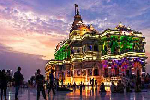

In [7]:
# print one sample image
url='https://www.holidify.com/images/tooltipImages/MATHURA.jpg'
im = Image.open(requests.get(url, stream=True).raw)
width, height = im.size 
#im = im.resize((round(width/2), round(height/2))) 
im = im.resize((150,100))
print(width)
print(height)
im

<i> Now, Extract data for best time to travel </i>

In [8]:
travel_data3 = soup.find_all('div',class_='result')

for div in travel_data3:
    for p in div.find_all('p',class_='destinationText'):
        for b in p.find_all('b'):
            if b.text=="Best Time : ":
                print(p.text)

 Best Time :  September to May 
 Best Time :  October to March 
 Best Time :  October to March 
 Best Time :  October to Jun 
 Best Time :  Jun to Sep 
 Best Time :  February to March, September to December 
 Best Time :  October to June 
 Best Time :  Throughout the year 
 Best Time :  October to June 
 Best Time :  Throughout the year 
 Best Time :  October to March 
 Best Time :  October to March 
 Best Time :  Throughout the year 
 Best Time :  October to March 
 Best Time :  October to June 
 Best Time :  September to May 
 Best Time :  September to June 
 Best Time :  October to June 
 Best Time :  October to March 
 Best Time :  Throughout the year 
 Best Time :  June to March 
 Best Time :  September to March 
 Best Time :  Throughout the year 
 Best Time :  October to March 
 Best Time :  September to March 
 Best Time :  Throughout the year 
 Best Time :  October to March 
 Best Time :  September to May 
 Best Time :  October to June 
 Best Time :  October to March 
 Best Tim

<i> Let us define python dataframe to collect and organize data </i>

In [9]:
# define the dataframe columns
column_names = ['Tourist Place', 'State', 'Speciality/Tag Name', 'Web Source Rating','Best time to visit','Picture'] 

# initiate the dataframe
travel_data = pd.DataFrame(columns=column_names)

<i> Let us read first set of information into dataframe </i>

In [10]:
# Read names of tourist destination
for dict in travel_data1['itemListElement']:
    t_name=dict['name']
#   t_split_name = re.split(' - |, ',t_name,2)
    t_split_name1 = re.split(' - ',t_name,1)
 
    #   split name data validation
    if len(t_split_name1) == 1:
        t_split_name1.append(' ')   
    
    t_split_name2 = re.split(', ',t_split_name1[0],1)            
    #   split name data validation
    if len(t_split_name2) == 1:
        t_split_name2.append(t_split_name2[0])
    
    t_rating = dict['position']
 
    
    travel_data = travel_data.append({'Tourist Place': t_split_name2[0],
                                      'State': t_split_name2[1],
                                      'Speciality/Tag Name': t_split_name1[1],
                                      'Web Source Rating': t_rating}, ignore_index=True)

travel_data.head()

,Tourist Place,State,Speciality/Tag Name,Web Source Rating,Best time to visit,Picture
0,Munnar,Kerala,"Tea Gardens, Lakes and Pretty little hill-stat...",1,NaN,NaN
1,Goa,Goa,"Beaches, Sunsets and Crazy Nights",2,NaN,NaN
2,Agra,Uttar Pradesh,"The city of Taj Mahal, the monument of eternal...",3,NaN,NaN
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,,4,NaN,NaN
4,Leh Ladakh,Jammu & Kashmir,,5,NaN,NaN


In [11]:
travel_data

,Tourist Place,State,Speciality/Tag Name,Web Source Rating,Best time to visit,Picture
0,Munnar,Kerala,"Tea Gardens, Lakes and Pretty little hill-stat...",1,NaN,NaN
1,Goa,Goa,"Beaches, Sunsets and Crazy Nights",2,NaN,NaN
2,Agra,Uttar Pradesh,"The city of Taj Mahal, the monument of eternal...",3,NaN,NaN
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,,4,NaN,NaN
4,Leh Ladakh,Jammu & Kashmir,,5,NaN,NaN
5,Darjeeling,West Bengal,Queen of The Himalayas,6,NaN,NaN
6,Manali,Himachal Pradesh,Lover's Paradise - India's Honeymoon capital,7,NaN,NaN
7,Ooty,Tamil Nadu,Queen of the Nilgiris,8,NaN,NaN
8,Shimla,Himachal Pradesh,The Hill-Station with Rich Colonial History,9,NaN,NaN
9,Gangtok,Sikkim,The Gateway to Sikkim,10,NaN,NaN


<i> Add, "Best time to visit" column data </i>

In [12]:
# Read "best time" for tourist destination
i=0

for div in travel_data3:
    for p in div.find_all('p',class_='destinationText'):
        for b in p.find_all('b'):
            if b.text=="Best Time : ":
                t_split_text = re.split(':  ',p.text,1)    

                travel_data.at[i,'Best time to visit'] = t_split_text[1]
                i=i+1
                
travel_data.head()

,Tourist Place,State,Speciality/Tag Name,Web Source Rating,Best time to visit,Picture
0,Munnar,Kerala,"Tea Gardens, Lakes and Pretty little hill-stat...",1,September to May,NaN
1,Goa,Goa,"Beaches, Sunsets and Crazy Nights",2,October to March,NaN
2,Agra,Uttar Pradesh,"The city of Taj Mahal, the monument of eternal...",3,October to March,NaN
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,,4,October to Jun,NaN
4,Leh Ladakh,Jammu & Kashmir,,5,Jun to Sep,NaN


<i> Now, Add one sample image of the location </i>

In [13]:
# Create HTML tag for image source 
def path_to_image_html(path):
#   return '<img src="'+ path + '"/>'
    return '<img src="'+ path + '" style=max-height:100px;"/>'

i=0
for div in travel_data2:
    url = div.img.get('data-original')
#    url_quote = "'" + url + "'"
#    img = Image.open(requests.get(url, stream=True).raw)
#    width, height = im.size 
#    ratio = width/height
#    img_height = 100
#    img_width = round(img_height*ratio)
#    img = img.resize((img_width,img_height))
    url_src = path_to_image_html(url)
    
    travel_data.at[i,'Picture'] = url_src
    i=i+1
        
travel_data.head()     

,Tourist Place,State,Speciality/Tag Name,Web Source Rating,Best time to visit,Picture
0,Munnar,Kerala,"Tea Gardens, Lakes and Pretty little hill-stat...",1,September to May,"<img src=""https://www.holidify.com/images/tool..."
1,Goa,Goa,"Beaches, Sunsets and Crazy Nights",2,October to March,"<img src=""https://www.holidify.com/images/tool..."
2,Agra,Uttar Pradesh,"The city of Taj Mahal, the monument of eternal...",3,October to March,"<img src=""https://www.holidify.com/images/tool..."
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,,4,October to Jun,"<img src=""https://www.holidify.com/images/tool..."
4,Leh Ladakh,Jammu & Kashmir,,5,Jun to Sep,"<img src=""https://www.holidify.com/images/tool..."


<i> Let us check out the data </i>

In [14]:
with pd.option_context('display.max_colwidth', -1): output_html_travel_data = HTML(travel_data.to_html(escape=False))
output_html_travel_data

,Tourist Place,State,Speciality/Tag Name,Web Source Rating,Best time to visit,Picture
0,Munnar,Kerala,"Tea Gardens, Lakes and Pretty little hill-station - Holidify Explorer Awards 2018 Winner",1,September to May,
1,Goa,Goa,"Beaches, Sunsets and Crazy Nights",2,October to March,
2,Agra,Uttar Pradesh,"The city of Taj Mahal, the monument of eternal love",3,October to March,
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,,4,October to Jun,
4,Leh Ladakh,Jammu & Kashmir,,5,Jun to Sep,
5,Darjeeling,West Bengal,Queen of The Himalayas,6,"February to March, September to December",
6,Manali,Himachal Pradesh,Lover's Paradise - India's Honeymoon capital,7,October to June,
7,Ooty,Tamil Nadu,Queen of the Nilgiris,8,Throughout the year,
8,Shimla,Himachal Pradesh,The Hill-Station with Rich Colonial History,9,October to June,
9,Gangtok,Sikkim,The Gateway to Sikkim,10,Throughout the year,


<i> Let us extract lattitude and longitude from geogy geocoder </i>

In [15]:
geolocator = Nominatim(user_agent="Ind_explorer")

for idx,row in travel_data.iterrows():
    address = row['Tourist Place'] + ", " + row['State']
    location = geolocator.geocode(address)
    if location == None:
        print(address)
        g = geocoder.arcgis(address)
        lat_long_coords = g.latlng
        travel_data.at[idx,'Latitude'] = lat_long_coords[0]
        travel_data.at[idx,'Longitude'] = lat_long_coords[1]
    else:
        latitude = location.latitude
        longitude = location.longitude
#       print('The geograpical coordinate are {}, {}.'.format(latitude, longitude), address)
        travel_data.at[idx,'Latitude'] = latitude
        travel_data.at[idx,'Longitude'] = longitude

Jim Corbett National Park, Uttarakhand


In [16]:
travel_data.head()

,Tourist Place,State,Speciality/Tag Name,Web Source Rating,Best time to visit,Picture,Latitude,Longitude
0,Munnar,Kerala,"Tea Gardens, Lakes and Pretty little hill-stat...",1,September to May,"<img src=""https://www.holidify.com/images/tool...",10.086724,77.060982
1,Goa,Goa,"Beaches, Sunsets and Crazy Nights",2,October to March,"<img src=""https://www.holidify.com/images/tool...",15.620452,73.764831
2,Agra,Uttar Pradesh,"The city of Taj Mahal, the monument of eternal...",3,October to March,"<img src=""https://www.holidify.com/images/tool...",27.175255,78.009816
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,,4,October to Jun,"<img src=""https://www.holidify.com/images/tool...",7.000017,93.811082
4,Leh Ladakh,Jammu & Kashmir,,5,Jun to Sep,"<img src=""https://www.holidify.com/images/tool...",34.146893,77.570511


<i> Let us see on map where these places are located </i>

In [17]:
# map of India using latitude and longitude values for tourist places
map_India = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, place, state in zip(travel_data['Latitude'], travel_data['Longitude'], travel_data['Tourist Place'], travel_data['State']):
    label = '{}, {}'.format(place,state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_India)  
    
map_India

<i> Now, let us explore these places and find popular venues nearby </i>

In [18]:
# Let us use Foursquare
CLIENT_ID = '42DAMOEH2K4BYCYRCA4HDXVG3UTDATXMKC4QPTB5URHHDJX5' # your Foursquare ID
CLIENT_SECRET = 'GFXHWBZWSJAVACDII3OJP4MVVA4RSHJDCZEGGFSU15EAY13I' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Place', 
                  'Place Latitude', 
                  'Place Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

<i> Let us get top 100 venues nearby for each location </i> 

In [20]:
LIMIT = 100 
tourism_venues = getNearbyVenues(names=travel_data['Tourist Place'],
                                   latitudes=travel_data['Latitude'],
                                   longitudes=travel_data['Longitude']
                                  )

Munnar
Goa
Agra
Andaman & Nicobar Islands
Leh Ladakh
Darjeeling
Manali
Ooty
Shimla
Gangtok
New Delhi
Udaipur
Dalhousie
Coorg
Kanha National Park
Kodaikanal
Mussoorie
Mcleodganj
Pondicherry
Vaishno Devi
Alleppey
Tirupati
Nainital
Mount Abu
Hyderabad
Bangalore
Jaipur
Lakshadweep
Mahabaleshwar
Lucknow
Mumbai
Srinagar
Jaisalmer
Ahmedabad
Kochi
Visakhapatnam
Chandigarh
Hampi
Jim Corbett National Park
Madurai
Aurangabad
Rameswaram
Ranthambore
Chennai
Almora
Auli
Kasol
Haridwar
Khajuraho
Gokarna
Kaziranga National Park
Rishikesh
Kanyakumari
Kolkata
Puri
Amritsar
Bodh Gaya
Pune
Cherrapunjee
Trivandrum
Mahabalipuram
Varanasi
Shillong
Bandhavgarh National Park
Shirdi
Pushkar
Jodhpur
Mathura


In [21]:
tourism_venues.head()

,Place,Place Latitude,Place Longitude,Venue,Venue Category
0,Munnar,10.086724,77.060982,Munnar,City
1,Munnar,10.086724,77.060982,Kaivalyam Retreat,Hotel
2,Munnar,10.086724,77.060982,The Panoramic Getaway Hotel,Roof Deck
3,Munnar,10.086724,77.060982,Hotel Saravana Bhavan,Asian Restaurant
4,Munnar,10.086724,77.060982,Punarjani Traditional Village,Performing Arts Venue


<i> Let's check how many venues were returned for each tourist place </i>

In [22]:
tourism_venues.groupby('Place').count()

,Place Latitude,Place Longitude,Venue,Venue Category
Place,,,,
Agra,61,61,61,61
Ahmedabad,100,100,100,100
Alleppey,100,100,100,100
Almora,4,4,4,4
Amritsar,43,43,43,43
Andaman & Nicobar Islands,1,1,1,1
Auli,7,7,7,7
Aurangabad,23,23,23,23
Bandhavgarh National Park,9,9,9,9


<i> Let's find out how many unique categories can be curated from all the returned venues </i>

In [23]:
print('There are {} uniques categories.'.format(len(tourism_venues['Venue Category'].unique())))
tourism_venues['Venue Category'].unique()

There are 236 uniques categories.


array(['City', 'Hotel', 'Roof Deck', 'Asian Restaurant',
       'Performing Arts Venue', 'Museum', 'Resort', 'Scenic Lookout',
       'Middle Eastern Restaurant', 'Indian Restaurant', 'Garden',
       'National Park', 'Park', 'Breakfast Spot', 'Juice Bar',
       'Italian Restaurant', 'Beach', 'Nightclub', 'Greek Restaurant',
       'Ice Cream Shop', 'Hostel', 'Burger Joint', 'Fish Market', 'Café',
       'French Restaurant', 'Restaurant', 'Rest Area', 'Historic Site',
       'Music Venue', 'Lounge', 'Japanese Restaurant', 'Flea Market',
       'Hotel Bar', 'Seafood Restaurant', 'Snack Place',
       'Eastern European Restaurant', 'Molecular Gastronomy Restaurant',
       'Bar', 'Surf Spot', 'Dive Bar', 'Tapas Restaurant', 'Pub',
       'Brazilian Restaurant', 'Grocery Store', 'Night Market',
       'Cocktail Bar', 'Mediterranean Restaurant', 'Fish & Chips Shop',
       'Karaoke Bar', 'Fried Chicken Joint',
       'Multicuisine Indian Restaurant', 'Fast Food Restaurant',
       'Bed & 

<i> Let us analyze each neighborhood </i>

In [24]:
# one hot encoding
tourism_onehot = pd.get_dummies(tourism_venues[['Venue Category']], prefix="", prefix_sep="")

# add place column back to dataframe
tourism_onehot['Place'] = tourism_venues['Place'] 

# get place column position
col_pos = tourism_onehot.columns.get_loc('Place')

# move place column to the first column
fixed_columns = [tourism_onehot.columns[col_pos]] + list(tourism_onehot.columns[:col_pos])+ list(tourism_onehot.columns[col_pos+1:])
tourism_onehot = tourism_onehot[fixed_columns]

tourism_onehot.head()

,Place,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Service,Airport Terminal,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Bengali Restaurant,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Building,Burger Joint,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Castle,Cave,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,City,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cricket Ground,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Heliport,Himalayan Restaurant,Hindu Temple,Historic Site,History Museum,Hookah Bar,Hostel,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Lighthouse,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,National Park,Nature Preserve,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,North Indian Restaurant,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Palace,Park,Parsi Restaurant,Performing Arts Venue,Pizza Place,Planetarium,Playground,Plaza,Pool,Port,Pub,Punjabi Restaurant,Racetrack,Rafting,Rajasthani Restaurant,Resort,Rest Area,Restaurant,River,Road,Roof Deck,Sake Bar,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Ski Area,Ski Chairlift,Ski Trail,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Spanish Restaurant,Spiritual Center,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Student Center,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Theme Park,Tibetan Restaurant,Tourist Information Center,Town,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Waterfall,Women's Store,Zoo
0,Munnar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Munnar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

In [25]:
tourism_onehot.shape

(2582, 237)

<i> Let us how venues are distributed </i>

In [26]:
# initiate the dataframe
tourism_onehot_sum_np = tourism_onehot.iloc[:,1:].sum(axis=0)
tourism_onehot_sum = pd.DataFrame(tourism_onehot_sum_np).reset_index() 
tourism_onehot_sum = tourism_onehot_sum.rename(columns={'index': 'Venue Category', 0 :'Count Across Location'})
tourism_onehot_sum.sort_values('Count Across Location', ascending=False, inplace=True)
tourism_onehot_sum.reset_index(drop=True)

,Venue Category,Count Across Location
0,Hotel,291
1,Indian Restaurant,268
2,Café,201
3,Bakery,73
4,Pizza Place,72
5,Resort,71
6,Coffee Shop,68
7,Restaurant,67
8,Fast Food Restaurant,64
9,Ice Cream Shop,59


<i> Let us try to put all the venue categories into some venue segments </i>

In [27]:
tourism_onehot_sum['Venue Type'] = ' '

# Put Keywords to identify different type of venue
#Food 
Key_words1 = ['Restaurant', 'Coffee', 'Pizza', 'Food', 'Café', 'Cafe', 'Bakery', 'Pub', 'Dhaba', 'Breakfast', 'Bar', 'Sandwich', 'Burger', 'Snack', 'Ice Cream', 'Donut'] 
#Recreation & Lifestyle
Key_words2 = ['Multiplex', 'Lounge', 'Theater', 'Shop', 'Mall', 'Nightclub', 'City', 'Town', 'Market', 'Spa', 'Store', 'Gym', 'Stadium', 'University']
#Hotel & Lodging
Key_words3 = ['Hotel', 'Motel', 'Lodge', 'Stay', 'Resort', 'Hostel']
#Adventure
Key_words4 = ['Trail' ,'Sport' ,'Outdoor' ,'Surf' ,'Ski' , 'Theme', 'Camp', 'Raft' ]
#Tourist Attraction
Key_words5 = ['Scene', 'Scenic' ,'Park' ,'Garden' ,'Hill' ,'Mountain' ,'Trail' ,'Beach' ,'Zoo', 'Cave', 'Nature', 'Lake', 'Land', 'Forest', 'River']
#Culture
Key_words6 = ['Museum' ,'Temple' ,'Spiritual' ,'Art' ,'Carft', 'History', 'Historic', 'Monumnet', 'Palace']
#Travel/Ride
Key_words7 = ['Airport' ,'Train' ,'Bus' ,'Car' ,'Taxi' ,'Cab', 'Port', 'Boat']

for index, row in tourism_onehot_sum.iterrows():
#    if ("Restaurant" or "Coffee" or "Pizza" or "Food" or "Cafe" or "Bakery" or "Pub" or "Dhaba") in row['Venue Category']:
    if any(word in row['Venue Category'] for word in Key_words1):
        tourism_onehot_sum.at[index,'Venue Type'] = 'Food'
        
    elif any(word in row['Venue Category'] for word in Key_words2):
        tourism_onehot_sum.at[index,'Venue Type'] = 'Recreation & Lifestyle'

    elif any(word in row['Venue Category'] for word in Key_words3):
        tourism_onehot_sum.at[index,'Venue Type'] = 'Hotel & Lodging'

    elif any(word in row['Venue Category'] for word in Key_words4):
        tourism_onehot_sum.at[index,'Venue Type'] = 'Adventure'
        
    elif any(word in row['Venue Category'] for word in Key_words5):
        tourism_onehot_sum.at[index,'Venue Type'] = 'Tourist Attraction'

    elif any(word in row['Venue Category'] for word in Key_words6):
        tourism_onehot_sum.at[index,'Venue Type'] = 'Culture'

    elif any(word in row['Venue Category'] for word in Key_words7):
        tourism_onehot_sum.at[index,'Venue Type'] = 'Travel/Ride'
    else:
        tourism_onehot_sum.at[index,'Venue Type'] = 'Other'
        print(row['Venue Category'])

BBQ Joint
Bookstore
Brewery
Diner
Fried Chicken Joint
Tea Room
Cricket Ground
Plaza
Gastropub
Bistro
Golf Course
Steakhouse
Arcade
Roof Deck
Road
Lighthouse
Neighborhood
General Entertainment
Deli / Bodega
Concert Hall
Harbor / Marina
Bridge
Rest Area
Boutique
Boarding House
Music Venue
Racetrack
Playground
Supermarket
Pool
Waterfall
Student Center
Tourist Information Center
School
ATM
Planetarium
Farm
Factory
Chaat Place
Castle
Building
Buffet
Bank
Auto Garage
Auto Dealership
Field
Organic Grocery
Noodle House
Jazz Club
Hot Spring
Heliport
General Travel


In [28]:
tourism_onehot_sum.head()

,Venue Category,Count Across Location,Venue Type
115,Hotel,291,Hotel & Lodging
120,Indian Restaurant,268,Food
41,Café,201,Food
19,Bakery,73,Food
172,Pizza Place,72,Food


<i> Let us see the venue type distribution </i> 

In [29]:
tourism_onehot_sum_group = tourism_onehot_sum.groupby('Venue Type').sum()['Count Across Location'].reset_index()
tourism_onehot_sum_group

,Venue Type,Count Across Location
0,Adventure,34
1,Culture,98
2,Food,1372
3,Hotel & Lodging,374
4,Other,185
5,Recreation & Lifestyle,332
6,Tourist Attraction,148
7,Travel/Ride,39


In [30]:
# Move 'Other' Venue Type to last 
target_row = 4
idx = [i for i in range(len(tourism_onehot_sum_group)) if i != target_row] + [target_row]

tourism_onehot_sum_group = tourism_onehot_sum_group.iloc[idx].reset_index(drop=True)
tourism_onehot_sum_group

,Venue Type,Count Across Location
0,Adventure,34
1,Culture,98
2,Food,1372
3,Hotel & Lodging,374
4,Recreation & Lifestyle,332
5,Tourist Attraction,148
6,Travel/Ride,39
7,Other,185


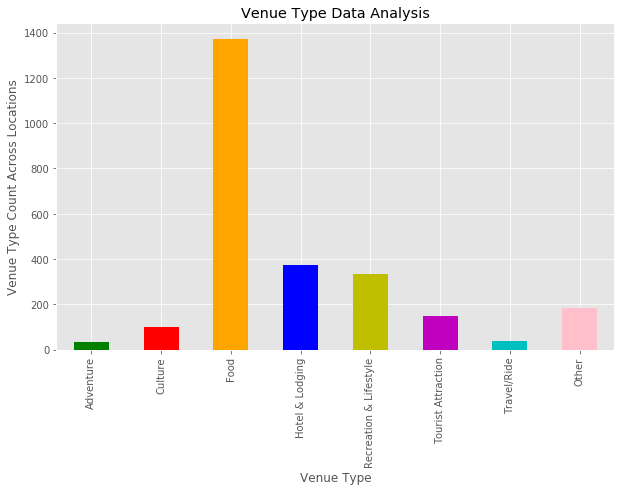

In [31]:
# Bar Plot
my_colors = ['g','r','orange','b','y','m','c','pink']
tourism_onehot_sum_group['Count Across Location'].plot(kind='bar', figsize=(10, 6), color = my_colors)

plt.xlabel('Venue Type') # add to x-label to the plot
plt.ylabel('Venue Type Count Across Locations') # add y-label to the plot
plt.title('Venue Type Data Analysis') # add title to the plot
plt.xticks(np.arange(8), tourism_onehot_sum_group['Venue Type'])

plt.show()

<i> Let us check out the skewed categories where venues are distributed abnormally high in comparison to other types </i>

In [32]:
# Venue Types that are skewed 
tourism_onehot_skew = tourism_onehot_sum.loc[(tourism_onehot_sum['Venue Type'] == 'Food') |
                                             (tourism_onehot_sum['Venue Type'] == 'Hotel & Lodging') |
                                             (tourism_onehot_sum['Venue Type'] == 'Recreation & Lifestyle')]
tourism_onehot_skew.sort_values(['Venue Type','Count Across Location'], ascending=False).groupby('Venue Type').head(10)

,Venue Category,Count Across Location,Venue Type
198,Shopping Mall,43,Recreation & Lifestyle
154,Multiplex,40,Recreation & Lifestyle
137,Lounge,25,Recreation & Lifestyle
51,City,23,Recreation & Lifestyle
162,Nightclub,18,Recreation & Lifestyle
63,Dessert Shop,17,Recreation & Lifestyle
62,Department Store,15,Recreation & Lifestyle
52,Clothing Store,15,Recreation & Lifestyle
151,Movie Theater,13,Recreation & Lifestyle
138,Market,12,Recreation & Lifestyle


In [33]:
tourism_onehot_skew.sort_values(['Venue Type','Count Across Location'], ascending=False).groupby('Venue Type').get_group('Food')

,Venue Category,Count Across Location,Venue Type
120,Indian Restaurant,268,Food
41,Café,201,Food
19,Bakery,73,Food
172,Pizza Place,72,Food
54,Coffee Shop,68,Food
185,Restaurant,67,Food
78,Fast Food Restaurant,64,Food
119,Ice Cream Shop,59,Food
124,Italian Restaurant,40,Food
13,Asian Restaurant,29,Food


<i> Let us remove the visibally common categories across the locations under venue tyep - Recreation & Lifestyle and Hotel & Lodging - <br>
Shopping Mall  
Multiplex  
Hotel  
    
Also, venue categories under food can be removed (which are in count more than 10) as they are extremely common and does not fall in decision process when users plan for travel destinations.      </i>

In [37]:
tourim_venues_not_to_consider = tourism_onehot_skew.loc[   (tourism_onehot_skew['Venue Category'] == 'Shopping Mall') | 
                                                           (tourism_onehot_skew['Venue Category'] == 'Multiplex') |
                                                           (tourism_onehot_skew['Venue Category'] == 'Hotel') |
                                                           (  (tourism_onehot_skew['Venue Type'] == 'Food') & 
                                                              (tourism_onehot_skew['Count Across Location'] >= 10))]

tourim_venues_not_to_consider

,Venue Category,Count Across Location,Venue Type
115,Hotel,291,Hotel & Lodging
120,Indian Restaurant,268,Food
41,Café,201,Food
19,Bakery,73,Food
172,Pizza Place,72,Food
54,Coffee Shop,68,Food
185,Restaurant,67,Food
78,Fast Food Restaurant,64,Food
119,Ice Cream Shop,59,Food
198,Shopping Mall,43,Recreation & Lifestyle


In [46]:
tourism_onehot_sum_final = tourism_onehot_sum[~ (tourism_onehot_sum['Venue Category'].isin(tourim_venues_not_to_consider['Venue Category']))]
                                                     
tourism_onehot_sum_group_final = tourism_onehot_sum_final.groupby('Venue Type').sum()['Count Across Location'].reset_index()
tourism_onehot_sum_group_final

,Venue Type,Count Across Location
0,Adventure,34
1,Culture,98
2,Food,162
3,Hotel & Lodging,83
4,Other,185
5,Recreation & Lifestyle,249
6,Tourist Attraction,148
7,Travel/Ride,39


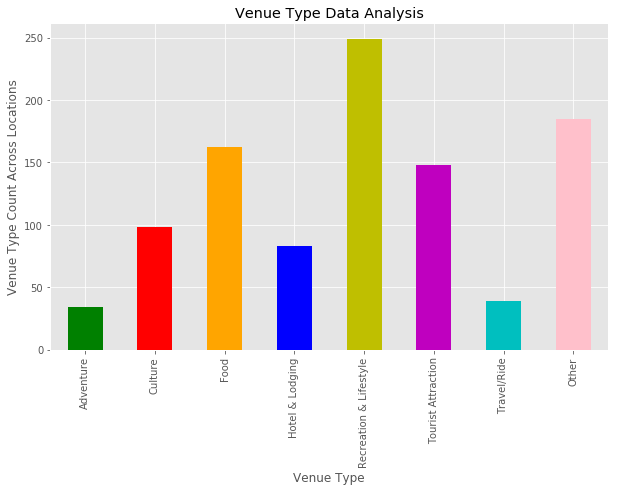

In [47]:
# Move 'Other' Venue Type to last 
target_row = 4
idx = [i for i in range(len(tourism_onehot_sum_group_final)) if i != target_row] + [target_row]

tourism_onehot_sum_group_final = tourism_onehot_sum_group_final.iloc[idx].reset_index(drop=True)

# Bar Plot
my_colors = ['g','r','orange','b','y','m','c','pink']
tourism_onehot_sum_group_final['Count Across Location'].plot(kind='bar', figsize=(10, 6), color = my_colors)

plt.xlabel('Venue Type') # add to x-label to the plot
plt.ylabel('Venue Type Count Across Locations') # add y-label to the plot
plt.title('Venue Type Data Analysis') # add title to the plot
plt.xticks(np.arange(8), tourism_onehot_sum_group_final['Venue Type'])

plt.show()

<i> Now, it looks skewness of the data is little reduced. So, we can remove these categories from main datframe </i> 

In [51]:
Row_list =[] 

for index, rows in tourim_venues_not_to_consider.iterrows():   
    # append the list
    Row_list.append(rows['Venue Category'])

tourism_onehot.drop(Row_list, axis=1, inplace=True )
tourism_onehot.head()

,Place,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Service,Airport Terminal,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Athletics & Sports,Auto Dealership,Auto Garage,Awadhi Restaurant,BBQ Joint,Bank,Beach,Bengali Restaurant,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Brewery,Bridge,Buffet,Building,Bus Station,Business Service,Cafeteria,Cajun / Creole Restaurant,Campground,Candy Store,Castle,Cave,Chaat Place,Cheese Shop,Chocolate Shop,City,Clothing Store,Cocktail Bar,Comfort Food Restaurant,Concert Hall,Convenience Store,Cricket Ground,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Dive Bar,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Heliport,Himalayan Restaurant,Hindu Temple,Historic Site,History Museum,Hookah Bar,Hostel,Hot Spring,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,Indian Sweet Shop,Indie Movie Theater,Irish Pub,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Karaoke Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Lighthouse,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Museum,Music Venue,National Park,Nature Preserve,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,North Indian Restaurant,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Palace,Park,Parsi Restaurant,Performing Arts Venue,Planetarium,Playground,Plaza,Pool,Port,Punjabi Restaurant,Racetrack,Rafting,Rajasthani Restaurant,Resort,Rest Area,River,Road,Roof Deck,Sake Bar,Scenic Lookout,School,Science Museum,Sculpture Garden,Shoe Store,Shop & Service,Ski Area,Ski Chairlift,Ski Trail,Smoke Shop,Soccer Stadium,South Indian Restaurant,Spa,Spanish Restaurant,Spiritual Center,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Student Center,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Theme Park,Tibetan Restaurant,Tourist Information Center,Town,Toy / Game Store,Trail,Train Station,Video Store,Waterfall,Women's Store,Zoo
0,Munnar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Munnar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Munnar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [52]:
tourism_onehot.shape

(2582, 210)

<i> Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category </i>

In [53]:
tourism_grouped = tourism_onehot.groupby('Place').mean().reset_index()
tourism_grouped

,Place,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Service,Airport Terminal,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Athletics & Sports,Auto Dealership,Auto Garage,Awadhi Restaurant,BBQ Joint,Bank,Beach,Bengali Restaurant,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Brewery,Bridge,Buffet,Building,Bus Station,Business Service,Cafeteria,Cajun / Creole Restaurant,Campground,Candy Store,Castle,Cave,Chaat Place,Cheese Shop,Chocolate Shop,City,Clothing Store,Cocktail Bar,Comfort Food Restaurant,Concert Hall,Convenience Store,Cricket Ground,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Dive Bar,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Heliport,Himalayan Restaurant,Hindu Temple,Historic Site,History Museum,Hookah Bar,Hostel,Hot Spring,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,Indian Sweet Shop,Indie Movie Theater,Irish Pub,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Karaoke Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Lighthouse,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Museum,Music Venue,National Park,Nature Preserve,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,North Indian Restaurant,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Palace,Park,Parsi Restaurant,Performing Arts Venue,Planetarium,Playground,Plaza,Pool,Port,Punjabi Restaurant,Racetrack,Rafting,Rajasthani Restaurant,Resort,Rest Area,River,Road,Roof Deck,Sake Bar,Scenic Lookout,School,Science Museum,Sculpture Garden,Shoe Store,Shop & Service,Ski Area,Ski Chairlift,Ski Trail,Smoke Shop,Soccer Stadium,South Indian Restaurant,Spa,Spanish Restaurant,Spiritual Center,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Student Center,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Theme Park,Tibetan Restaurant,Tourist Information Center,Town,Toy / Game Store,Trail,Train Station,Video Store,Waterfall,Women's Store,Zoo
0,Agra,0.0,0.000000,0.000000,0.016393,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.016393,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00000,0.016393,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016393,0.000000,0.000000,0.00,0.016393,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000000,0.081967,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.016393,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.016393,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.016393,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000

In [54]:
tourism_grouped.shape

(68, 210)

<i> Let us create a function to sort venues in decending order </i>

In [55]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

<i> Now let's create the new dataframe and display the top 15 venues for each tourist location </i>

In [56]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Place']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
place_venues_sorted = pd.DataFrame(columns=columns)
place_venues_sorted['Place'] = tourism_grouped['Place']

for ind in np.arange(tourism_grouped.shape[0]):
    place_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tourism_grouped.iloc[ind, :], num_top_venues)

place_venues_sorted.head()

,Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Agra,Historic Site,Resort,Fried Chicken Joint,South Indian Restaurant,Garden,Bistro,Market,Mughlai Restaurant,Buffet,Indian Sweet Shop,Train Station,Airport,Dive Bar,Food & Drink Shop,Dhaba
1,Ahmedabad,Dessert Shop,Tea Room,Mexican Restaurant,Clothing Store,BBQ Joint,Cupcake Shop,Cricket Ground,Event Space,Farmers Market,Sculpture Garden,Food Court,Fried Chicken Joint,Mediterranean Restaurant,Bookstore,Lounge
2,Alleppey,Art Gallery,Performing Arts Venue,Nightclub,Motorcycle Shop,Stadium,Athletics & Sports,Mediterranean Restaurant,Resort,Department Store,Fried Chicken Joint,Movie Theater,Garden,Beach,Gastropub,BBQ Joint
3,Almora,Flea Market,Resort,City,Zoo,Factory,Food Court,Food & Drink Shop,Food,Fish Market,Fish & Chips Shop,Field,Farmers Market,Farm,Falafel Restaurant,Fabric Shop
4,Amritsar,Diner,Resort,Museum,Punjabi Restaurant,Frozen Yogurt Shop,Fish & Chips Shop,City,Monument / Landmark,Zoo,Falafel Restaurant,Food,Flea Market,Fish Market,Field,Farmers Market


<i> Let us apply K-means algorithm for clutering </i>

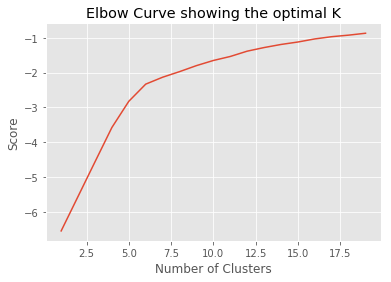

In [57]:
# Prepare data input for K-means algorithm
tourism_grouped_clustering = tourism_grouped.drop('Place', 1)

# Let us check what is optimal K 
N = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in N]

score = [kmeans[i].fit(tourism_grouped_clustering).score(tourism_grouped_clustering) for i in range(len(kmeans))]

plt.plot(N,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve showing the optimal K')

plt.show()

In [58]:
# Let us take the optimal value of K
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tourism_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5] 

array([0, 0, 0, 3, 0], dtype=int32)

<i> Add Cluster label to all the tourist locations </i>

In [59]:
tourism_merged = travel_data

# add clustering labels
tourism_merged.insert(0, 'Cluster Labels', kmeans.labels_)
tourism_merged.dropna(inplace=True)
tourism_merged['Cluster Labels'] = tourism_merged['Cluster Labels'].astype(int) 
tourism_merged

,Cluster Labels,Tourist Place,State,Speciality/Tag Name,Web Source Rating,Best time to visit,Picture,Latitude,Longitude
0,0,Munnar,Kerala,"Tea Gardens, Lakes and Pretty little hill-stat...",1,September to May,"<img src=""https://www.holidify.com/images/tool...",10.086724,77.060982
1,0,Goa,Goa,"Beaches, Sunsets and Crazy Nights",2,October to March,"<img src=""https://www.holidify.com/images/tool...",15.620452,73.764831
2,0,Agra,Uttar Pradesh,"The city of Taj Mahal, the monument of eternal...",3,October to March,"<img src=""https://www.holidify.com/images/tool...",27.175255,78.009816
3,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,,4,October to Jun,"<img src=""https://www.holidify.com/images/tool...",7.000017,93.811082
4,0,Leh Ladakh,Jammu & Kashmir,,5,Jun to Sep,"<img src=""https://www.holidify.com/images/tool...",34.146893,77.570511
5,4,Darjeeling,West Bengal,Queen of The Himalayas,6,"February to March, September to December","<img src=""https://www.holidify.com/images/tool...",26.682113,88.329069
6,0,Manali,Himachal Pradesh,Lover's Paradise - India's Honeymoon capital,7,October to June,"<img src=""https://www.holidify.com/images/tool...",32.245461,77.187293
7,0,Ooty,Tamil Nadu,Queen of the Nilgiris,8,Throughout the year,"<img src=""https://www.holidify.com/images/bgIm...",11.405169,76.696339
8,3,Shimla,Himachal Pradesh,The Hill-Station with Rich Colonial History,9,October to June,"<img src=""https://www.holidify.com/images/bgIm...",31.104153,77.170973
9,0,Gangtok,Sikkim,The Gateway to Sikkim,10,Throughout the year,"<img src=""https://www.holidify.com/images/tool...",27.329046,88.612267


<i> Let us create cluster map </i>

In [60]:
# create map
India_latitude = 20.5937
India_longitude = 78.9629
map_clusters = folium.Map(location=[India_latitude, India_longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tourism_merged['Latitude'], tourism_merged['Longitude'], tourism_merged['Tourist Place'], tourism_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='white',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<i> Cluster Validation </i>

In [61]:
cluster_dict = {}
html_dict = {}
map_dict = {}
for i in range(10):
    # cluster
    cluster_dict[i] = tourism_merged.loc[tourism_merged['Cluster Labels'] == i, tourism_merged.columns[[1] + list(range(2, tourism_merged.shape[1]))]]
    
    # html_view_cluster 
    with pd.option_context('display.max_colwidth', -1): html_dict[i] = HTML(cluster_dict[i].to_html(escape=False))
    
    # map for cluster
    cluster =  i
    map_dict[i] = folium.Map(location=[India_latitude, India_longitude], zoom_start=4)
    # add markers to the map
    for lat, lon, poi,st in zip(cluster_dict[i]['Latitude'], cluster_dict[i]['Longitude'], cluster_dict[i]['Tourist Place'], cluster_dict[i]['State']):
        label = folium.Popup(str(poi) + ',' + str(st) + '-' + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=7,
            popup=label,
            color='black',
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_dict[i])

<i> Cluster 1 </i>

In [62]:
html_dict[0]

,Tourist Place,State,Speciality/Tag Name,Web Source Rating,Best time to visit,Picture,Latitude,Longitude
0,Munnar,Kerala,"Tea Gardens, Lakes and Pretty little hill-station - Holidify Explorer Awards 2018 Winner",1,September to May,,10.086724,77.060982
1,Goa,Goa,"Beaches, Sunsets and Crazy Nights",2,October to March,,15.620452,73.764831
2,Agra,Uttar Pradesh,"The city of Taj Mahal, the monument of eternal love",3,October to March,,27.175255,78.009816
4,Leh Ladakh,Jammu & Kashmir,,5,Jun to Sep,,34.146893,77.570511
6,Manali,Himachal Pradesh,Lover's Paradise - India's Honeymoon capital,7,October to June,,32.245461,77.187293
7,Ooty,Tamil Nadu,Queen of the Nilgiris,8,Throughout the year,,11.405169,76.696339
9,Gangtok,Sikkim,The Gateway to Sikkim,10,Throughout the year,,27.329046,88.612267
10,New Delhi,NCR,The city of cities,11,October to March,,28.688244,77.121215
11,Udaipur,Rajasthan,The city of Lakes,12,October to March,,24.578721,73.686257
12,Dalhousie,Himachal Pradesh,Little Switzerland of India,13,Throughout the year,,32.536047,75.979749


In [63]:
map_dict[0]

<i> Cluster 2 </i>

In [64]:
html_dict[1]

,Tourist Place,State,Speciality/Tag Name,Web Source Rating,Best time to visit,Picture,Latitude,Longitude
53,Kolkata,West Bengal,The city of Joy,54,October to March,,22.567746,88.347602


In [65]:
map_dict[1]

<i> Cluster 3 </i>

In [66]:
html_dict[2]

,Tourist Place,State,Speciality/Tag Name,Web Source Rating,Best time to visit,Picture,Latitude,Longitude
35,Visakhapatnam,Andhra Pradesh,A gem of South India,36,September to March,,17.723128,83.301284


In [67]:
map_dict[2]

<i> Cluster 4 </i>

In [68]:
html_dict[3]

,Tourist Place,State,Speciality/Tag Name,Web Source Rating,Best time to visit,Picture,Latitude,Longitude
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,,4,October to Jun,,7.000017,93.811082
8,Shimla,Himachal Pradesh,The Hill-Station with Rich Colonial History,9,October to June,,31.104153,77.170973
25,Bangalore,Karnataka,Garden city of India,26,Throughout the year,,12.979120,77.591300
30,Mumbai,Maharashtra,The City of Dreams,31,October to February,,18.938771,72.835335
56,Bodh Gaya,Bihar,"Buddha, Mahabodhi Tree and the land of Nirvana",57,October to March,,24.696261,84.993764


In [69]:
map_dict[3]

<i> Cluster 5 </i>

In [70]:
html_dict[4]

,Tourist Place,State,Speciality/Tag Name,Web Source Rating,Best time to visit,Picture,Latitude,Longitude
5,Darjeeling,West Bengal,Queen of The Himalayas,6,"February to March, September to December",,26.682113,88.329069


In [71]:
map_dict[4]

<i> Cluster 6 </i>

In [72]:
html_dict[5]

,Tourist Place,State,Speciality/Tag Name,Web Source Rating,Best time to visit,Picture,Latitude,Longitude
27,Lakshadweep,Lakshadweep,Blue Sea and Unspoiled Beaches,28,September to May,,10.565685,72.640639


In [73]:
map_dict[5]